In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('6_lakh(head).csv')

In [3]:
dataset.head(2)

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
0,726,1609,126,1.0,126.0,0.842105,1
1,4252,147,77,1.0,357.5,2.652174,1


In [4]:
dataset.describe(include='all')

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,4527.501758,4870.536165,271.085063,0.984682,271.121336,88.153504,0.742227
std,2883.846327,2925.016824,235.124603,0.089062,230.237627,205.526020,0.437409
min,1.000000,1.000000,0.000000,0.142857,0.000000,0.000084,0.000000
25%,2080.000000,2099.000000,20.000000,1.000000,20.000000,0.742424,0.000000
50%,4151.000000,5133.000000,244.000000,1.000000,255.000000,1.204819,1.000000
75%,6911.000000,7610.000000,472.000000,1.000000,461.500000,5.386792,1.000000
max,10000.000000,10000.000000,13000.000000,1.000000,13000.000000,653.000000,1.000000


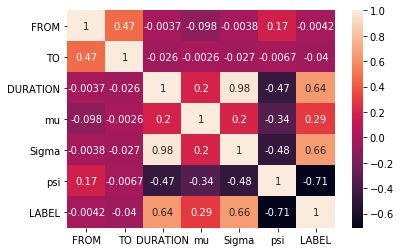

In [5]:
##We plot the heatmap by using the correlation for the dataset. 
##This helps us eliminate any features that may not help with prediction.
sns.heatmap(dataset.corr(), annot=True)

In [6]:
# creating input features and target variables
X= dataset.iloc[:,0:6]
y= dataset.iloc[:,6]

In [7]:
X.head(2)

,FROM,TO,DURATION,mu,Sigma,psi
0,726,1609,126,1.0,126.0,0.842105
1,4252,147,77,1.0,357.5,2.652174


In [8]:
#Since our input features are at different scales we need to standardize the input.
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.31820648, -1.11504961, -0.61705658,  0.17199445, -0.63031164,
        -0.42481955],
       [-0.09553283, -1.61487622, -0.8254569 ,  0.17199445,  0.37517211,
        -0.41601254],
       [ 0.85597498, -0.04873007,  1.76040821,  0.17199445,  1.79761672,
        -0.42548602],
       ...,
       [-0.71484512, -0.88701655, -1.08489402,  0.17199445, -1.11097486,
        -0.39860966],
       [-0.01508464, -1.39983454, -1.14443697,  0.17199445, -1.16888609,
        -0.37683727],
       [-1.38166345, -1.55709872, -1.1401839 ,  0.17199445, -1.16454275,
         2.56340747]])

In [9]:
##We now split the input features and target variables into training dataset and test dataset. 
##out test dataset will be 30% of our entire dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
#We have preprocessed the data and we are now ready to build the neural network.
#We are using keras to build our neural network.
#We import the keras library to create the neural network layers.


#There are two main types of models available in keras — Sequential and Model. 
#we will use Sequential model to build our neural network.
#We use Dense library to build input, hidden and output layers of a neural network.

In [11]:
from keras import Sequential
from keras.layers import Dense

In [12]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=6))
#Second  Hidden Layer
classifier.add(Dense(3, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [13]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [14]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
42000/42000 [==============================] - 54s 1ms/step - loss: 0.0493 - accuracy: 0.9909
Epoch 2/100
42000/42000 [==============================] - 55s 1ms/step - loss: 0.0317 - accuracy: 0.9944
Epoch 3/100
42000/42000 [==============================] - 55s 1ms/step - loss: 0.0293 - accuracy: 0.9949
Epoch 4/100
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0286 - accuracy: 0.9951
Epoch 5/100
42000/42000 [==============================] - 56s 1ms/step - loss: 0.0282 - accuracy: 0.9951
Epoch 6/100
42000/42000 [==============================] - 54s 1ms/step - loss: 0.0277 - accuracy: 0.9952
Epoch 7/100
42000/42000 [==============================] - 57s 1ms/step - loss: 0.0274 - accuracy: 0.9952
Epoch 8/100
42000/42000 [==============================] - 57s 1ms/step - loss: 0.0272 - accuracy: 0.9952
Epoch 9/100
42000/42000 [==============================] - 58s 1ms/step - loss: 0.0272 - accuracy: 0.9952
Epoch 10/100
42000/42000 [====================

42000/42000 [==============================] - 51s 1ms/step - loss: 0.0264 - accuracy: 0.9954
Epoch 77/100
42000/42000 [==============================] - 42s 1ms/step - loss: 0.0264 - accuracy: 0.9955
Epoch 78/100
42000/42000 [==============================] - 34s 807us/step - loss: 0.0263 - accuracy: 0.9955
Epoch 79/100
42000/42000 [==============================] - 44s 1ms/step - loss: 0.0264 - accuracy: 0.9955
Epoch 80/100
42000/42000 [==============================] - 45s 1ms/step - loss: 0.0264 - accuracy: 0.9955
Epoch 81/100
42000/42000 [==============================] - 35s 832us/step - loss: 0.0264 - accuracy: 0.9955
Epoch 82/100
42000/42000 [==============================] - 40s 944us/step - loss: 0.0265 - accuracy: 0.9954
Epoch 83/100
42000/42000 [==============================] - 47s 1ms/step - loss: 0.0263 - accuracy: 0.9955
Epoch 84/100
42000/42000 [==============================] - 35s 831us/step - loss: 0.0264 - accuracy: 0.9955
Epoch 85/100
42000/42000 [================

In [15]:
##We can also evaluate the loss value & metrics values for the model in test mode using evaluate function
eval_model=classifier.evaluate(X_train, y_train)
eval_model

13125/13125 [==============================] - 7s 518us/step - loss: 0.0277 - accuracy: 0.9951


[0.027670949697494507, 0.9950642585754395]

In [16]:
#We now predict the output for our test dataset. 
#If the prediction is greater than 0.5 then the output is 1 else the output is 0

y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [17]:
#we check the accuracy on the test dataset
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 45883    673]
 [   223 133221]]


In [20]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
print(acc)

0.9950222222222223


In [1]:
####DESSION TREE

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # For plotting
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees

In [3]:
df=pd.read_csv('6_lakh(head).csv')

In [4]:
Xcol=df.columns[:-1]
ycol=df.columns[-1]
ycol

'LABEL'

In [5]:
X = df.iloc[:,0:6].values
y = df.iloc[:,6].values

In [6]:
X

array([[7.26000000e+02, 1.60900000e+03, 1.26000000e+02, 1.00000000e+00,
        1.26000000e+02, 8.42105263e-01],
       [4.25200000e+03, 1.47000000e+02, 7.70000000e+01, 1.00000000e+00,
        3.57500000e+02, 2.65217391e+00],
       [6.99600000e+03, 4.72800000e+03, 6.85000000e+02, 1.00000000e+00,
        6.85000000e+02, 7.05128205e-01],
       ...,
       [2.46600000e+03, 2.27600000e+03, 1.60000000e+01, 1.00000000e+00,
        1.53333333e+01, 6.22891566e+00],
       [4.48400000e+03, 7.76000000e+02, 2.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 1.07037037e+01],
       [5.43000000e+02, 3.16000000e+02, 3.00000000e+00, 1.00000000e+00,
        3.00000000e+00, 6.15000000e+02]])

In [7]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
# Fit the model
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

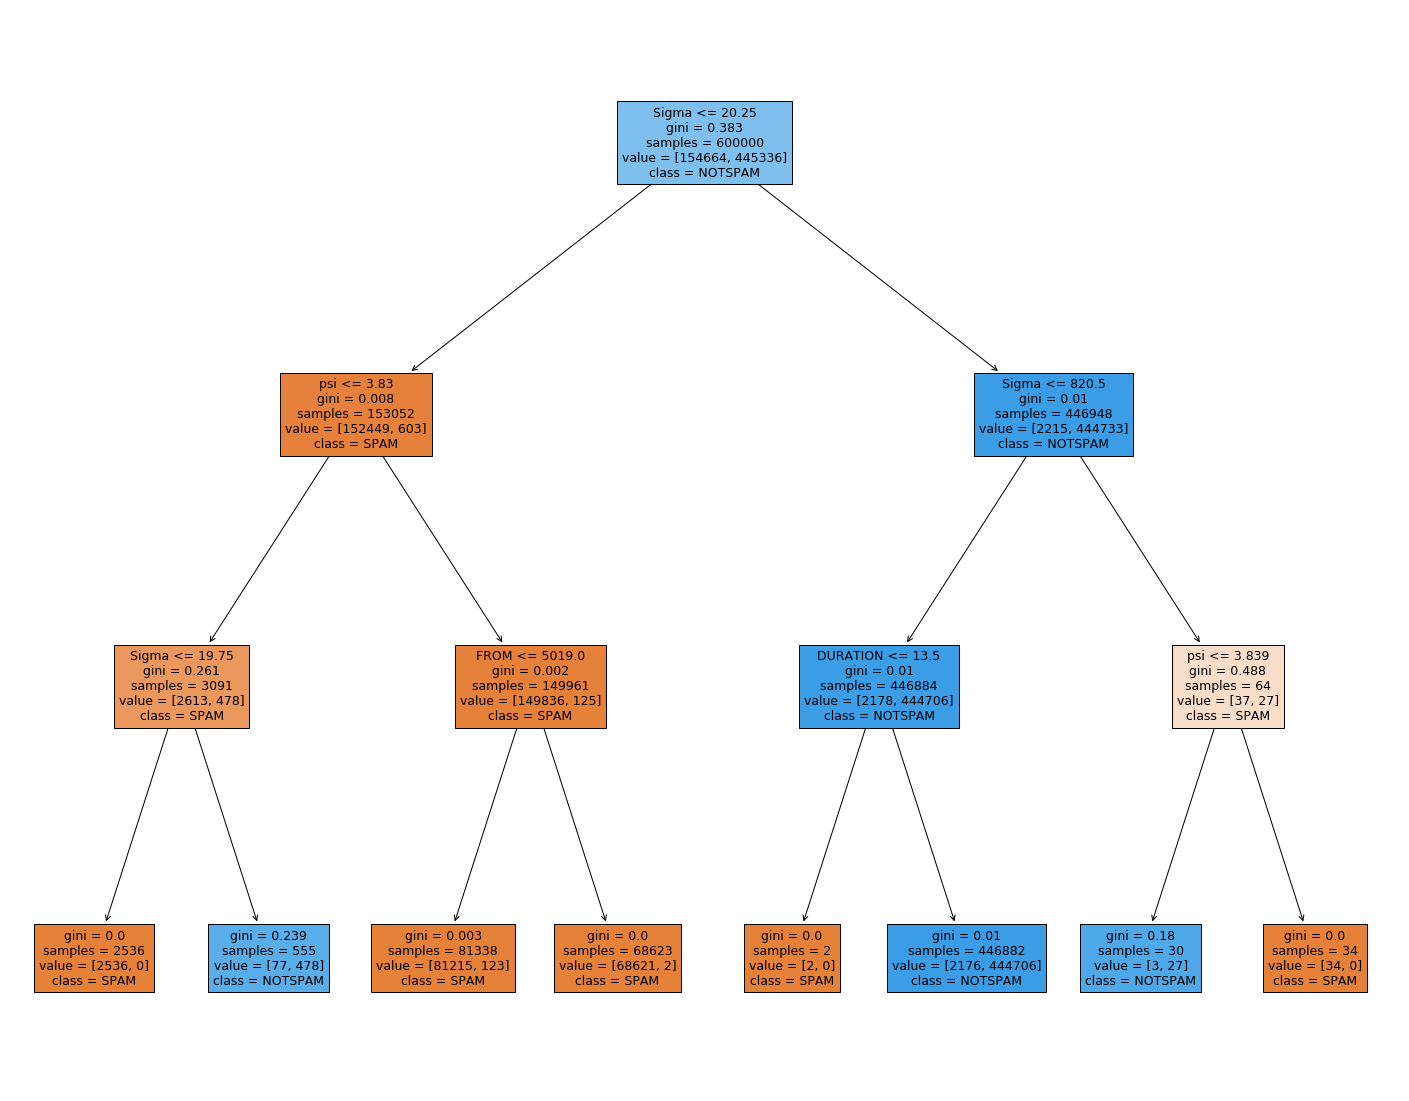

In [8]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=Xcol,  
                   class_names=['SPAM','NOTSPAM'],
                   filled=True)

In [9]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X)
accuracy=accuracy_score(y,y_pred)
accuracy

0.9960316666666666

In [11]:
df1=pd.read_csv('test(head).csv')
X_test= df1.iloc[:,0:6].values
y_test= df1.iloc[:,6].values

In [12]:
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.968

In [13]:
###Logistic Regression

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [15]:
data=pd.read_csv("6_lakh(head).csv")
data.head()

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
0,726,1609,126,1.0,126.0,0.842105,1
1,4252,147,77,1.0,357.5,2.652174,1
2,6996,4728,685,1.0,685.0,0.705128,1
3,505,1870,1,1.0,1.0,630.000000,0
4,3903,8342,149,1.0,149.0,0.778523,1


In [16]:
model=LogisticRegression()

In [17]:
X=(data.iloc[:,data.columns!="LABEL"]).values
y=(data["LABEL"]).values

In [18]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred=model.predict(X)
mse=mean_squared_error(y,y_pred)
print(mse)

0.017495


In [20]:
acc=accuracy_score(y,y_pred)
print(acc)

0.982505


In [21]:
data1=pd.read_csv("test(head).csv")
data1.head()

,FROM,TO,DURATION,mu,Sigma,psi,LABEL
0,1,75,2,1.0,283.0,0.594595,1
1,40,88,2,1.0,2.0,0.754545,1
2,2,59,5,1.0,240.5,0.626087,1
3,30,70,7,1.0,7.0,0.702970,1
4,29,71,9,1.0,234.0,0.500000,1


In [22]:
Xtest=(data1.iloc[:,data.columns!="LABEL"]).values
ytest=(data1["LABEL"]).values


In [23]:
ytest_pred=model.predict(Xtest)
mse_test=mean_squared_error(ytest,ytest_pred)
print(mse_test)

0.0131


In [24]:
acc=accuracy_score(ytest,ytest_pred)
print(acc)

0.9869
